The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[-4.8381186 25.244371   0.3      ]


[ -0.96794087 -15.151388     0.3       ]


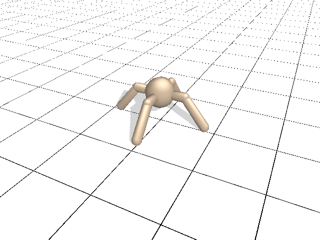

In [7]:
%load_ext autoreload
%autoreload 2

# from brax import jumpy as jp
# import brax
# from brax.io import image
# from IPython.display import Image
# from procedural_envs import composer
# from procedural_envs.misc.observers import GraphObserver, EXTRA_ROOT_NODE_DICT
# from procedural_envs.tasks.observation_config import obs_config_dict
# import random

# env_0 = 'worm_touch_5'
# obs_config_0 = 'amorpheus'
# obs_config = obs_config_dict[obs_config_0]

# if ('handsup2' in env_0) and ('ant' in env_0):
#     obs_config['extra_root_node'] = EXTRA_ROOT_NODE_DICT['ant_handsup2']
# elif ('handsup2' in env_0) and ('centipede' in env_0):
#     obs_config['extra_root_node'] = EXTRA_ROOT_NODE_DICT['centipede_handsup2']
# elif ('handsup' in env_0) and ('unimal' in env_0):
#     obs_config['extra_root_node'] = EXTRA_ROOT_NODE_DICT['unimal_handsup']
# elif 'handsup' in env_0:
#     obs_config['extra_root_node'] = EXTRA_ROOT_NODE_DICT['handsup']

# observer = GraphObserver(name=obs_config_0, **obs_config)
# env_fn = composer.create_fn(env_0, observer=observer, observer2=observer)
# env = env_fn()
import copy
import functools
import os
import pprint
import jax
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"]="false"
from absl import app
from absl import flags
from brax.io import html
from brax.io import model
from brax.experimental.braxlines import experiments
from brax.experimental.braxlines.common import logger_utils
from datetime import datetime
import matplotlib.pyplot as plt

from algo import ppo_mlp
from procedural_envs import composer
from procedural_envs.misc.observers import GraphObserver, EXTRA_ROOT_NODE_DICT
from procedural_envs.tasks.observation_config import obs_config_dict
from brax import jumpy as jp
from numpy import random
from IPython.display import Image
from brax.io import image

# save dir
env_0 = 'ant_touch_4'
obs_config_0 = 'amorpheus'
environment_params = {
  'env_name': env_0,
  'obs_config': obs_config_0,
}
obs_config = obs_config_dict[obs_config_0]

if ('handsup2' in env_0) and ('ant' in env_0):
    obs_config['extra_root_node'] = EXTRA_ROOT_NODE_DICT['ant_handsup2']
elif ('handsup2' in env_0) and ('centipede' in env_0):
    obs_config['extra_root_node'] = EXTRA_ROOT_NODE_DICT['centipede_handsup2']
elif ('handsup' in env_0) and ('unimal' in env_0):
    obs_config['extra_root_node'] = EXTRA_ROOT_NODE_DICT['unimal_handsup']
elif 'handsup' in env_0:
    obs_config['extra_root_node'] = EXTRA_ROOT_NODE_DICT['handsup']

env_config = copy.deepcopy(environment_params)
observer = GraphObserver(name=obs_config_0, **obs_config)
# create env
env_fn = composer.create_fn(env_name=env_0, observer=observer, observer2=observer)
env = env_fn()
converted_qp = []
for _ in range(1):
    cus_state = env.reset(rng=jp.random_prngkey(seed=random.randint(0, 100000000)))
    converted_qp.append(cus_state.qp)
    display(Image(image.render(env.sys, converted_qp[-1:], width=320, height=240, ssaa=2)))